In [1]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [8]:
print("No of categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("No of categories in 'race_ethnicity' variable:     ", end=" ")
print(df['race_ethnicity'].unique())

print("No of categories in 'parental_level_of_education' variable:     ", end=" ")
print(df['parental_level_of_education'].unique())

print("No of categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("No of categories in 'test_preparation_course' variable:     ", end=" ")
print(df['test_preparation_course'].unique())

No of categories in 'gender' variable:      ['female' 'male']
No of categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
No of categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
No of categories in 'lunch' variable:      ['standard' 'free/reduced']
No of categories in 'test_preparation_course' variable:      ['none' 'completed']


In [9]:
num_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("There are {} Numerical features : {}".format(len(num_feature), num_feature))
print("\nThere are {} Categorical features : {}".format(len(cat_feature), cat_feature))

There are 3 Numerical features : ['math_score', 'reading_score', 'writing_score']

There are 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
df['total'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total']/3

In [11]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [13]:
math_full= df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print("No of students scoring full in math test: {}".format(math_full))
print("No of students scoring full in reading test: {}".format(reading_full))
print("No of students scoring full in writing test: {}".format(writing_full))

No of students scoring full in math test: 7
No of students scoring full in reading test: 17
No of students scoring full in writing test: 14


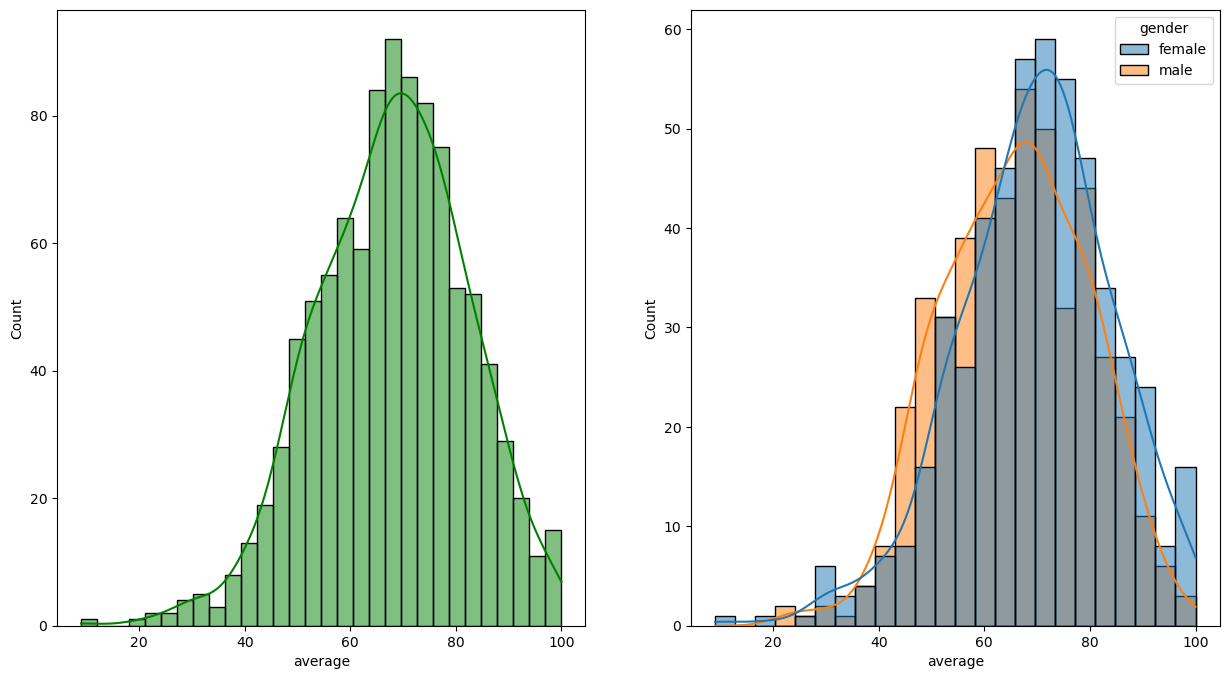

In [15]:
fig,axs = plt.subplots(1,2, figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()